# Fashion MNIST - Building a CNN model with TensorFlow

# Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

# Loading data


In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

## Explore Data

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Reshaping and building tensors


**What we need :**

Image shape : 28 x 28 x 1

Train_data shape : 60000 x 28 x 28 x 1

Test_data shape : 10000 x 28 x 28 x 1

Train_labels shape: 60000

Test_labels shape: 10000

In [4]:
#store first column as target vector
train_labels = np.array(train.label)
test_labels = np.array(test.label)

train.drop('label',axis=1, inplace=True)
test.drop('label',axis=1, inplace=True)

#Reshape - adding one more dimension to each image
train_data = np.array(train).reshape(train.shape[0],28,28,1)
test_data = np.array(test).reshape(test.shape[0],28,28,1)

#Print shapes
print('Train tensor shape: ',train_data.shape)
print('Test tensor shape: ',test_data.shape)
print('Single image shape:', train_data[0].shape)
print('Train_labels shape:', train_labels.shape)
print('Test_labels shape:', test_labels.shape)

Train tensor shape:  (60000, 28, 28, 1)
Test tensor shape:  (10000, 28, 28, 1)
Single image shape: (28, 28, 1)
Train_labels shape: (60000,)
Test_labels shape: (10000,)


# Label names

Each training and test example is assigned to one of the following numbers :

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Make a list of label names


In [5]:
#Create label names
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Visualize images randomly

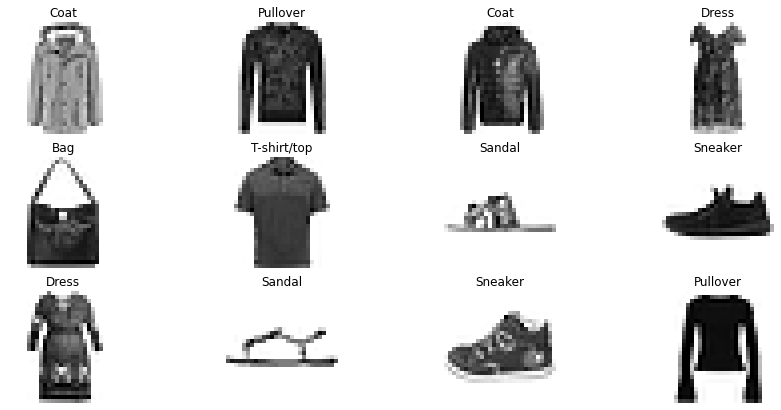

In [6]:
import random
plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[train_labels[rand_index]])

# Normalization
As the pixel values range from 0 to 256 , So dividing all the values by 255 will convert it to range from 0 to 1

In [7]:
# Normalize
train_norm = train_data / 255.0
test_norm = test_data / 255.0

# Split the data


In [8]:
X_train = train_norm[10000:]
y_train = train_labels[10000:]

X_valid = train_norm[:10000]
y_valid = train_labels[:10000]

# Modeling

## Create model

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Create model
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="same", activation="relu",
                           input_shape=(28,28,1)), 
    tf.keras.layers.Conv2D(10,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(15,3, padding="valid", activation='relu'),
    tf.keras.layers.Conv2D(20,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(25,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") #Output layer

])

## Compile the model

In [10]:
#Compile the model
model.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

#Show summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 5)         50        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 10)        460       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 15)        1365      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 20)          2720      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 25)          4

## Fit the model

In [12]:
#Fit the model
history = model.fit(X_train, y_train,
                    epochs=15,batch_size=32,
                    validation_data=(X_valid,y_valid), verbose=1
                    )

2022-04-22 11:38:33.249223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7142 - accuracy: 0.7338 - val_loss: 0.4988 - val_accuracy: 0.8190
Epoch 2/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4739 - accuracy: 0.8310 - val_loss: 0.4361 - val_accuracy: 0.8382
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4059 - accuracy: 0.8536 - val_loss: 0.3963 - val_accuracy: 0.8593
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3694 - accuracy: 0.8667 - val_loss: 0.3602 - val_accuracy: 0.8674
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3447 - accuracy: 0.8769 - val_loss: 0.3433 - val_accuracy: 0.8767
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3277 - accuracy: 0.8818 - val_loss: 0.3365 - val_accuracy: 0.8783
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3099 - accuracy: 0.8878 - val_loss: 0.3280 -

## Train/Validation Results

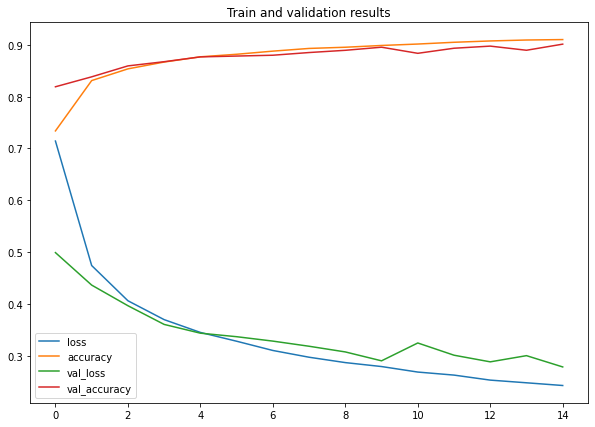

In [13]:
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

# Evaluating model on test data

In [14]:
loss, accuracy = model.evaluate(test_norm, test_labels)
print('Test accuracy:' , accuracy * 100,'%')

313/313 [==============================] - 1s 4ms/step - loss: 0.2692 - accuracy: 0.9028
Test accuracy: 90.28000235557556 %


## Confusion matrix

In [15]:
#Make predictions
y_probs = model.predict(test_norm)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

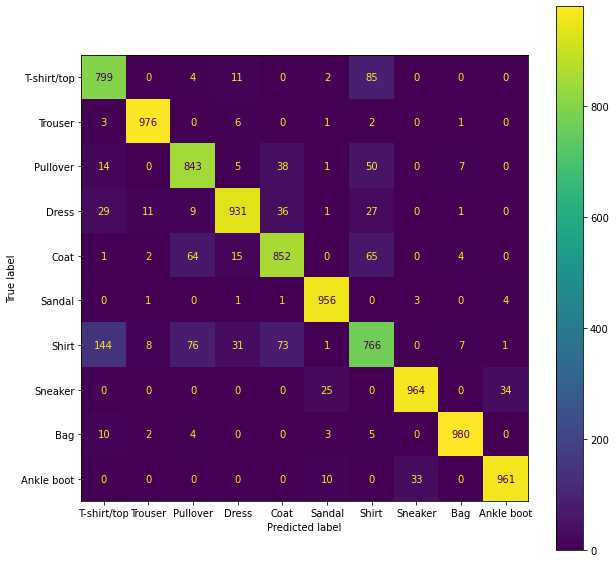

In [16]:
#Confusion matrix
cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

The model is getting confused mostly between similar classes like Shirt and T-shirt/top or Coat and Pullover

## Visualizing random predictions

In [17]:
import random
def plot_random_image(model,images, true_labels, classes):

    plt.figure(figsize=(10,15))

    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        rand_index=random.choice(range(len(images)))

        #Make prediction
        target_image=images[rand_index]
        pred_probs=model.predict(tf.expand_dims(target_image,axis=0))
        pred_label=classes[pred_probs.argmax()]
        true_label= classes[true_labels[rand_index]]
        plt.imshow(target_image,cmap=plt.cm.binary)
        
        #Change the color of the titles
        if pred_label==true_label:
            color="green"
        else:
            color="red"

        plt.xlabel("Pred:{} {:2.0f}% \n(True:{})".format(pred_label,
                                             100*tf.reduce_max(pred_probs),
                                             true_label),
                                             color=color, fontsize=13
                                             )
        #Hide ticks
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

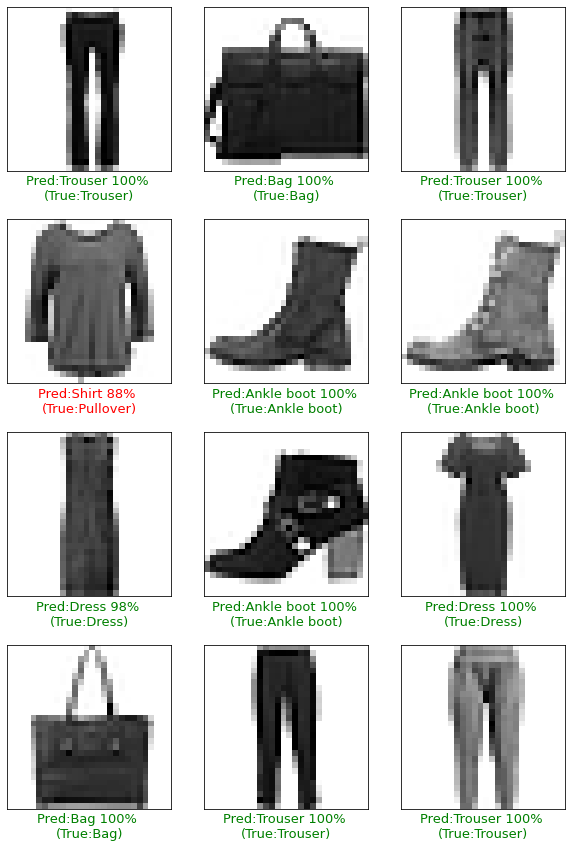

In [18]:
#Run to make random predictions
plot_random_image(model,test_norm,test_labels,label_names)